Marketing Campaign Analysis dataset source:Maven Analytics Data Playground

Are there any null values or outliers? How will you handle them?

What factors are significantly related to the number of web purchases?

Which marketing campaign was the most successful?

What does the average customer look like?

Which products are performing best?

Which channels are underperforming?



In [152]:
import pandas as pd

In [153]:
df=pd.read_csv('marketing_data.csv')

In [154]:
df.iloc[0:5,1:10]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6


In [155]:
df.iloc[0:5,11:28]

,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


In [156]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [157]:
df1=pd.read_csv('marketing_data_dictionary.csv')

In [158]:
df1.head(30)

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


In [159]:
for i in df1['Description'][20:27]:
    print(i)

1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1 if customer accepted the offer in the 4th campaign, 0 otherwise
1 if customer accepted the offer in the 5th campaign, 0 otherwise
1 if customer accepted the offer in the 1st campaign, 0 otherwise
1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1 if customer accepted the offer in the last campaign, 0 otherwise
1 if customer complained in the last 2 years, 0 otherwise


Are there any null values or outliers? How will you handle them?

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [161]:
df[' Income '].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name:  Income , dtype: float64

In [162]:
df[' Income '].fillna(df[' Income '].median(),axis=0,inplace=True)

In [165]:
df[' Income '].isnull().sum()

0

There seem to be ouliers in data which might impact mean hence,using median to deal with null values in Income

In [164]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer,Country
count,2240,2240,2240,2240
unique,5,8,663,8
top,Graduation,Married,2012-08-31,Spain
freq,1127,864,12,1095


In [12]:
df.iloc[:,0:20].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [171]:
import matplotlib.pyplot as plt

In [180]:
def outliers_check(i):
    plt.boxplot(df[i])
    plt.xlabel(i)
    print('Boxplot for ',i)
    

In [203]:
def outliers_fix(i):
    Q1=df[i].quantile(0.25)#first quartile
    Q3=df[i].quantile(0.75)#third quartile
    IQR=Q3-Q1#interquartile range
    upper_limit=Q3+(1.5*IQR)
    lower_limit=Q1-(1.5*IQR)
    df_median=df[i].median()
    df[i]=df[i].apply(lambda x:df_median if(x>upper_limit or x<lower_limit) else x)

In [206]:
#ouliers in Income

Boxplot for   Income 


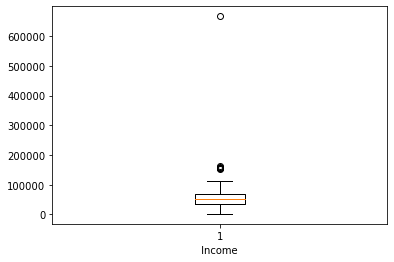

In [181]:
outliers_check(' Income ')

In [204]:
outliers_fix(' Income ')


In [205]:
df[' Income '].describe()

count      2240.000000
mean      51630.036161
std       20564.846848
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68098.250000
max      113734.000000
Name:  Income , dtype: float64

In [211]:
#ouliers in MntWines

Boxplot for  MntWines


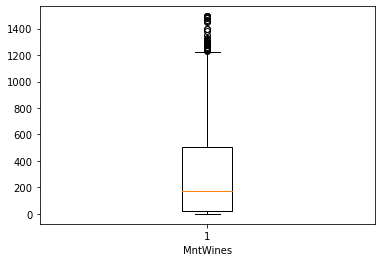

In [207]:
outliers_check('MntWines')

In [209]:
outliers_fix('MntWines')

In [210]:
df['MntWines'].describe()

count    2240.000000
mean      285.683259
std       310.279574
min         0.000000
25%        23.750000
50%       173.250000
75%       479.000000
max      1224.000000
Name: MntWines, dtype: float64

In [212]:
#outliers in MntFishProducts

Boxplot for  MntFishProducts


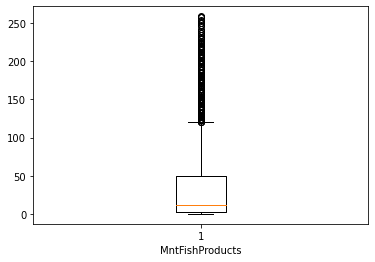

In [214]:
outliers_check('MntFishProducts')

In [215]:
outliers_fix('MntFishProducts')

In [216]:
df['MntFishProducts'].describe()

count    2240.000000
mean       21.314286
std        27.831455
min         0.000000
25%         3.000000
50%        12.000000
75%        28.000000
max       120.000000
Name: MntFishProducts, dtype: float64

In [ ]:
#ouliers MntFruits

Boxplot for  MntFruits


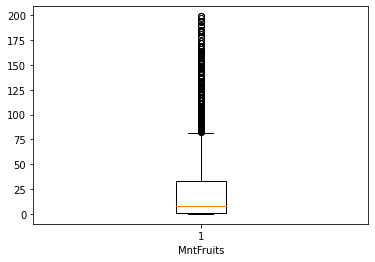

In [217]:
outliers_check('MntFruits')

In [218]:
outliers_fix('MntFruits')

In [219]:
df['MntFruits'].describe()

count    2240.000000
mean       14.281250
std        18.719299
min         0.000000
25%         1.000000
50%         8.000000
75%        19.000000
max        81.000000
Name: MntFruits, dtype: float64

In [220]:
#ouliers in MntMeatProducts

Boxplot for  MntMeatProducts


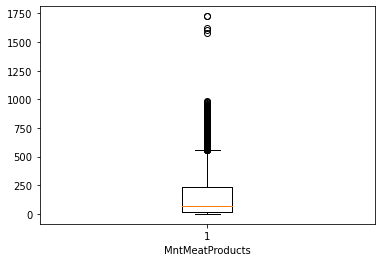

In [222]:
outliers_check('MntMeatProducts')

In [223]:
outliers_fix('MntMeatProducts')

In [225]:
df['MntMeatProducts'].describe()

count    2240.000000
mean      112.670089
std       135.044047
min         0.000000
25%        16.000000
50%        67.000000
75%       153.000000
max       555.000000
Name: MntMeatProducts, dtype: float64

In [226]:
#ouliers in MntSweetProducts

Boxplot for  MntSweetProducts


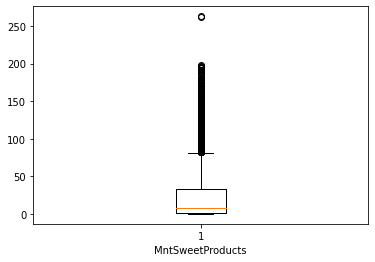

In [227]:
outliers_check('MntSweetProducts')

In [228]:
outliers_fix('MntSweetProducts')

In [229]:
df['MntSweetProducts'].describe()

count    2240.000000
mean       13.855804
std        18.117876
min         0.000000
25%         1.000000
50%         8.000000
75%        18.000000
max        81.000000
Name: MntSweetProducts, dtype: float64

In [230]:
#outliers in gold products

Boxplot for  MntGoldProds


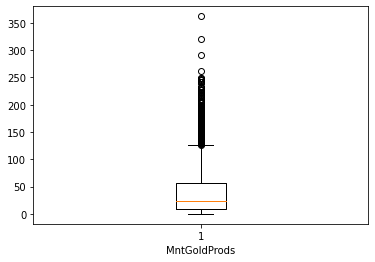

In [231]:
outliers_check('MntGoldProds')

In [233]:
outliers_fix('MntGoldProds')

In [234]:
df['MntGoldProds'].describe()

count    2240.000000
mean       30.015625
std        28.751608
min         0.000000
25%         9.000000
50%        24.000000
75%        40.250000
max       126.000000
Name: MntGoldProds, dtype: float64

In [240]:
#ouliers in Year_Birth

Boxplot for  Year_Birth


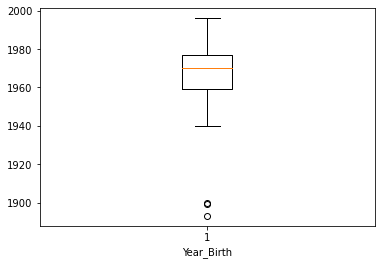

In [236]:
outliers_check('Year_Birth')

In [237]:
outliers_fix('Year_Birth')

Boxplot for  Year_Birth


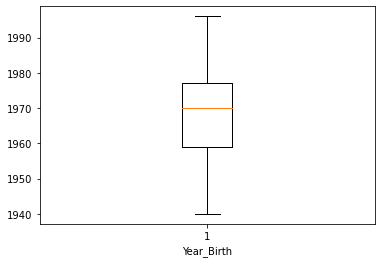

In [239]:
outliers_check('Year_Birth')

In [241]:
#exploring other attribute

In [242]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [272]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [282]:
y=df['Marital_Status'].value_counts().idxmax()
y

'Married'

In [275]:
df['Marital_Status']=df['Marital_Status'].str.replace('YOLO',y)

In [276]:
df['Marital_Status']=df['Marital_Status'].str.replace('Absurd',y)

In [277]:
df['Marital_Status'].value_counts()

Married     868
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: Marital_Status, dtype: int64

What factors are significantly related to the number of web purchases?


In [283]:
import seaborn as sns

In [284]:
A=df.iloc[:,0:10]

In [285]:
i=df['NumWebPurchases']

In [286]:
A=pd.concat([A,i],axis=1)

In [287]:
A.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases
0,1826,1970.0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189.0,4
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,7
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,3
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,1
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,3


In [288]:
A.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases
ID,1.000000,0.003062,0.000738,0.002406,-0.002580,-0.046524,-0.029490,-0.018924
Year_Birth,0.003062,1.000000,-0.210966,0.233979,-0.363181,-0.019637,-0.156359,-0.153989
Income,0.000738,-0.210966,1.000000,-0.527027,0.041937,0.005572,0.709660,0.491548
Kidhome,0.002406,0.233979,-0.527027,1.000000,-0.036133,0.008827,-0.496302,-0.361647
Teenhome,-0.002580,-0.363181,0.041937,-0.036133,1.000000,0.016198,0.019484,0.155500
Recency,-0.046524,-0.019637,0.005572,0.008827,0.016198,1.000000,0.019222,-0.010726
MntWines,-0.029490,-0.156359,0.709660,-0.496302,0.019484,0.019222,1.000000,0.551592
NumWebPurchases,-0.018924,-0.153989,0.491548,-0.361647,0.155500,-0.010726,0.551592,1.000000


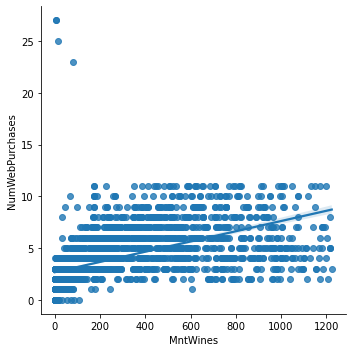

In [289]:
sns.lmplot(y='NumWebPurchases',x='MntWines',data=df)

In [290]:
import scipy.stats as s

In [291]:
pearson_coef,p_value=s.pearsonr(df['NumWebPurchases'],df['MntWines'])

In [292]:
print('The pearson_coef=',pearson_coef,' The p value is ',p_value)

The pearson_coef= 0.5515917725034333  The p value is  1.5403375098359687e-178


There is moderate positive corelation between Web purchases and Wine Purchases and since the p value is small,the relationship is statistically significant

In [293]:
B=df.iloc[:,10:28]

In [294]:
B.corr()


,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
MntFruits,1.000000,0.433735,0.467033,0.400267,0.338949,-0.034263,0.298400,0.407673,0.423426,-0.333787,0.013697,0.038054,0.157874,0.100906,0.025019,0.109029,-0.004185
MntMeatProducts,0.433735,1.000000,0.461862,0.417706,0.370937,-0.035716,0.389444,0.569081,0.539785,-0.414469,0.004236,0.086394,0.213075,0.214703,0.050278,0.127475,-0.018084
MntFishProducts,0.467033,0.461862,1.000000,0.467480,0.324891,-0.050743,0.317406,0.416525,0.434202,-0.343800,-0.016876,0.032099,0.213696,0.160514,0.053257,0.089411,0.015550
MntSweetProducts,0.400267,0.417706,0.467480,1.000000,0.284807,-0.048276,0.282550,0.417520,0.430399,-0.323274,-0.025190,0.030689,0.171307,0.155531,0.031802,0.107397,-0.005619
MntGoldProds,0.338949,0.370937,0.324891,0.284807,1.000000,0.094042,0.393606,0.370778,0.395438,-0.206761,0.063045,0.054419,0.139575,0.107696,0.042766,0.107860,-0.033090
NumDealsPurchases,-0.034263,-0.035716,-0.050743,-0.048276,0.094042,1.000000,0.234185,-0.008617,0.068879,0.347633,-0.023109,0.015594,-0.183248,-0.123244,-0.037695,0.002238,0.000420
NumWebPurchases,0.298400,0.389444,0.317406,0.282550,0.393606,0.234185,1.000000,0.378376,0.502713,-0.055846,0.042176,0.155903,0.138684,0.155143,0.034188,0.148730,-0.016310
NumCatalogPurchases,0.407673,0.569081,0.416525,0.417520,0.370778,-0.008617,0.378376,1.000000,0.518738,-0.520364,0.104730,0.139247,0.322321,0.308097,0.099852,0.220810,-0.020453
NumStorePurchases,0.423426,0.539785,0.434202,0.430399,0.395438,0.068879,0.502713,0.518738,1.000000,-0.428473,-0.067577,0.179379,0.214790,0.183249,0.085189,0.039363,-0.016524
NumWebVisitsMonth,-0.333787,-0.414469,-0.343800,-0.323274,-0.206761,0.347633,-0.055846,-0.520364,-0.428473,1.000000,0.061211,-0.032126,-0.278113,-0.192502,-0.007196,-0.003987,0.019769


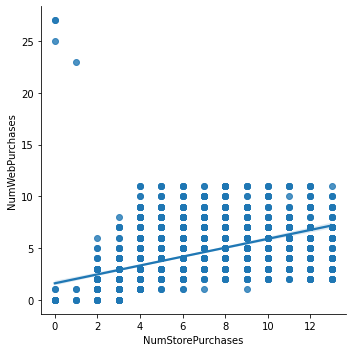

In [295]:
sns.lmplot(y='NumWebPurchases',x='NumStorePurchases',data=df)

In [296]:
pearson_coef,p_value=s.pearsonr(df['NumWebPurchases'],df['NumWebPurchases'])

In [297]:
print('The pearson_coef=',pearson_coef,' The p value is ',p_value)

The pearson_coef= 0.9999999999999978  The p value is  0.0


There is moderate positive corelation between Web purchases and Store Purchases and since the p value is small,the relationship is statistically significant

Which marketing campaign was the most successful?


In [303]:
C=df.iloc[:,20:25]

In [304]:
C.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [305]:
C.sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

Text(0.5, 1.0, 'Distribution of Responses to various campaigns')

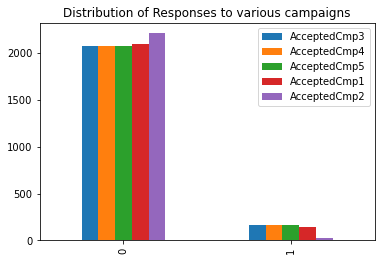

In [307]:
C.apply(pd.value_counts).plot(kind='bar')
plt.title('Distribution of Responses to various campaigns')

Campaign 3 4 5 seems to have better response than campaign 1 and Campaign 2 did not fare well

What does the average customer look like?


In [128]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dt_Customer_Year'],
      dtype='object')

In [129]:
df.iloc[:,1:9].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,1968.802144,51972.834762,0.443948,0.506476,49.121036
std,11.985494,21410.605416,0.538390,0.544555,28.963662
min,1893.000000,1730.000000,0.000000,0.000000,0.000000
25%,1959.000000,35533.500000,0.000000,0.000000,24.000000
50%,1970.000000,51717.000000,0.000000,0.000000,49.000000
75%,1977.000000,68277.500000,1.000000,1.000000,74.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000


In [134]:
df.iloc[:,9:20].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213
std,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [135]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer,Country
count,2239,2239,2239,2239
unique,5,8,663,8
top,Graduation,Married,2012-08-31,Spain
freq,1126,864,12,1095


In [143]:
df[['Response','Complain']].value_counts()

Response  Complain
0         0           1887
1         0            331
0         1             18
1         1              3
dtype: int64

Which products are performing best?


Text(0, 0.5, 'Products')

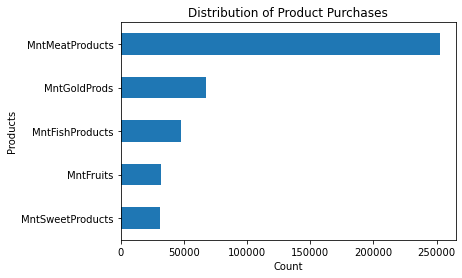

In [312]:
df.iloc[:,10:15].sum().sort_values().plot(kind='barh')
plt.title('Distribution of Product Purchases')
plt.xlabel('Count')
plt.ylabel('Products')

Which channels are underperforming?

Text(0.5, 1.0, 'Distribution of useage of different Purchase Channels')

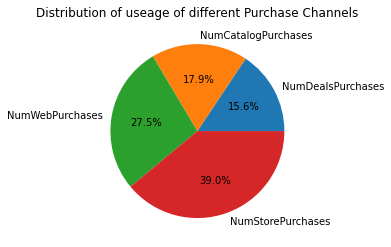

In [319]:
df.iloc[:,15:19].sum().sort_values().plot(kind='pie',autopct='%1.1f%%',label=' ')
plt.title('Distribution of useage of different Purchase Channels')